# Introduction 

This notebook provides a replicate of my work as a research assistant at Trinity College. I'll leave out the data cleansing part which I did for a first couple of months and only focus on the modelling here.

Main author: Rasha Ahmed and Mark Stater

Research Assistant: My Phung

Paper:

## Part 1: Load data and continue cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_excel('car_data_updated.xlsx')
data.head()

,year,mtfname,mtf,segmentname,segment,makeandseries,doors,style,stylenum,drivetype,...,large,manual_2005,manual_2006,manual_2007,manual_2008,manual_2009,manual_2010,manual_2011,manual_2012,manual_2013
0,0.0,Acura,1.0,LUX,4.0,NSX 3.0,2.0,coupe,4.0,RWD,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,Acura,1.0,LUX,4.0,NSX 3.2,2.0,coupe,4.0,RWD,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,Acura,1.0,LUX,4.0,3.5RL,4.0,sedan,1.0,AWD,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,Acura,1.0,LUX,4.0,RSX,2.0,coupe,4.0,FWD,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,Acura,1.0,LUX,4.0,RSX Type-S,2.0,coupe,4.0,FWD,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Get a summary**

In [3]:
def getDfSummary(input_data):
    output_data=input_data.describe() 
    output_data.loc['number_distinct'] = input_data.nunique() 
    output_data.loc['number_nan'] = input_data.isna().sum()
    output_data=output_data.T
    return output_data

df_sum = getDfSummary(data)
df_sum

,count,mean,std,min,25%,50%,75%,max,number_distinct,number_nan
year,4980.0,4.058835,2.600298,0.0,2.0,4.0,6.0,8.0,9.0,5501.0
mtf,4980.0,9.286546,6.364539,1.0,4.0,7.0,14.0,21.0,20.0,5501.0
segment,4980.0,2.587751,1.268261,1.0,1.0,2.0,4.0,4.0,4.0,5501.0
doors,4980.0,3.332731,0.943436,2.0,2.0,4.0,4.0,5.0,3.0,5501.0
stylenum,4980.0,2.317470,1.560141,1.0,1.0,1.0,4.0,6.0,6.0,5501.0
...,...,...,...,...,...,...,...,...,...,...
manual_2009,10461.0,0.000287,0.016933,0.0,0.0,0.0,0.0,1.0,2.0,20.0
manual_2010,10461.0,0.000382,0.019552,0.0,0.0,0.0,0.0,1.0,2.0,20.0
manual_2011,10461.0,0.000382,0.019552,0.0,0.0,0.0,0.0,1.0,2.0,20.0
manual_2012,10461.0,0.000574,0.023943,0.0,0.0,0.0,0.0,1.0,2.0,20.0


**Fill in missing values**

In [4]:
#Categorical data in this dataset has a max of 20 classes. 
cols_mode = df_sum[df_sum['number_distinct']<=20].index.tolist()
cols_mean = df_sum[df_sum['number_distinct']>20].index.tolist()

data_full = data
#Fill in missing values with mean values if data is continuous
data_full[cols_mean] = data_full[cols_mean].fillna(data_full[cols_mean].mean())
#Fill in missing values with mode values if data is categorical
data_full[cols_mode] = data_full[cols_mode].fillna(data_full[cols_mode].mode().loc[0])

In [5]:
getDfSummary(data_full[cols_mean])

,count,mean,std,min,25%,50%,75%,max,number_distinct,number_nan
wheelbase,10481.0,107.179639,5.622160,73.500000,107.179639,107.179639,107.179639,1.507000e+02,168.0,0.0
length,10481.0,183.489819,10.187732,106.100000,183.489819,183.489819,183.489819,2.427000e+02,357.0,0.0
width,10481.0,71.640040,2.260527,61.400000,71.640040,71.640040,71.640040,8.340000e+01,130.0,0.0
height,10481.0,56.635522,1.974383,44.300000,56.635522,56.635522,57.100000,6.500000e+01,134.0,0.0
size,10481.0,13177.761905,1049.617202,6514.540000,13177.761905,13177.761905,13177.761905,1.893060e+04,660.0,0.0
curbweight,10481.0,3480.116867,447.588121,1585.000000,3470.000000,3480.116867,3480.116867,6.494000e+03,1155.0,0.0
cid,10481.0,193.057245,52.745355,0.000000,183.000000,193.057245,193.057245,5.100000e+02,138.0,0.0
sizecc,10481.0,3162.432731,865.459657,999.000000,2995.000000,3162.432731,3162.432731,8.382000e+03,216.0,0.0
liter,10481.0,3.173534,0.864536,1.000000,3.000000,3.173534,3.173534,8.400000e+00,54.0,0.0
borestroke2,10481.0,3.471494,0.190397,2.400000,3.471494,3.471494,3.471494,4.200000e+00,22.0,0.0


In [6]:
getDfSummary(data_full[cols_mode])

,count,mean,std,min,25%,50%,75%,max,number_distinct,number_nan
year,10481.0,6.127373,2.662020,0.0,4.0,8.0,8.0,8.0,9.0,0.0
mtf,10481.0,7.561588,4.683886,1.0,6.0,6.0,6.0,21.0,20.0,0.0
segment,10481.0,3.328976,1.123215,1.0,2.0,4.0,4.0,4.0,4.0,0.0
doors,10481.0,3.682950,0.730696,2.0,4.0,4.0,4.0,5.0,3.0,0.0
stylenum,10481.0,1.625990,1.260675,1.0,1.0,1.0,1.0,6.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...
manual_2009,10481.0,0.000286,0.016917,0.0,0.0,0.0,0.0,1.0,2.0,0.0
manual_2010,10481.0,0.000382,0.019533,0.0,0.0,0.0,0.0,1.0,2.0,0.0
manual_2011,10481.0,0.000382,0.019533,0.0,0.0,0.0,0.0,1.0,2.0,0.0
manual_2012,10481.0,0.000572,0.023921,0.0,0.0,0.0,0.0,1.0,2.0,0.0


In [7]:
data.columns.tolist()

['year',
 'mtfname',
 'mtf',
 'segmentname',
 'segment',
 'makeandseries',
 'doors',
 'style',
 'stylenum',
 'drivetype',
 'drivetypenum',
 'wheelbase',
 'length',
 'width',
 'height',
 'size',
 'curbweight',
 'enginetypename',
 'enginetype',
 'cylindername',
 'cylinder',
 'cid',
 'sizecc',
 'liter',
 'valvescyl',
 'fuelsysinj',
 'fsnum',
 'fuelsysintake',
 'fuelintakenum',
 'mpgfuel',
 'mpgfueltype',
 'borestroke1',
 'borestroke2',
 'borestroke3',
 'borestroke4',
 'compratio',
 'horsepower',
 'hprpm',
 'torque',
 'torque2',
 'torque3',
 'torquerpm',
 'transmission',
 'transmissioninitial',
 'transmissionnum',
 'speed',
 'opt',
 'tractioncont',
 'stabilitycont',
 'whlabs',
 'avgmpg',
 'e85fuelcomp',
 'retailp',
 'guzzlertax',
 'mpgcity',
 'mpghwy',
 'anothermeasureofavgmpg',
 'year0',
 'year1',
 'year2',
 'year3',
 'year4',
 'year5',
 'year6',
 'year7',
 'year8',
 'log_mpg',
 'log_hp',
 'log_torque',
 'log_weight',
 'price',
 'log_weight2',
 'log_hp2',
 'log_torque2',
 'log_weight_hp',

## Part 2: EDA

**Note:** among these columns, there are some original columns and some self-generated columns (like 'log_hp' = log('hp') or 'lux' = 1 if it's a luxury car).
In fact, only the first 57 columns are original. We should start our EDA with them

In [8]:
org_cols = data_full.columns.tolist()[:57]
data_org = data_full[org_cols]
data_org.head()

,year,mtfname,mtf,segmentname,segment,makeandseries,doors,style,stylenum,drivetype,...,tractioncont,stabilitycont,whlabs,avgmpg,e85fuelcomp,retailp,guzzlertax,mpgcity,mpghwy,anothermeasureofavgmpg
0,0.0,Acura,1.0,LUX,4.0,NSX 3.0,2.0,coupe,4.0,RWD,...,S,--,S,20.15,NaN,89765.0,--,17.0,24.0,20.2
1,0.0,Acura,1.0,LUX,4.0,NSX 3.2,2.0,coupe,4.0,RWD,...,S,--,S,20.15,NaN,89765.0,--,17.0,24.0,20.2
2,0.0,Acura,1.0,LUX,4.0,3.5RL,4.0,sedan,1.0,AWD,...,--,S,S,21.60,NaN,49470.0,--,18.0,26.0,21.6
3,0.0,Acura,1.0,LUX,4.0,RSX,2.0,coupe,4.0,FWD,...,--,--,S,30.15,NaN,20745.0,--,27.0,34.0,30.2
4,0.0,Acura,1.0,LUX,4.0,RSX Type-S,2.0,coupe,4.0,FWD,...,--,--,S,27.15,NaN,24140.0,--,24.0,31.0,27.2


In [9]:
#We only care about well-defined columns
df_org_sum = getDfSummary(data_org)
org_cols = df_org_sum.index.tolist()

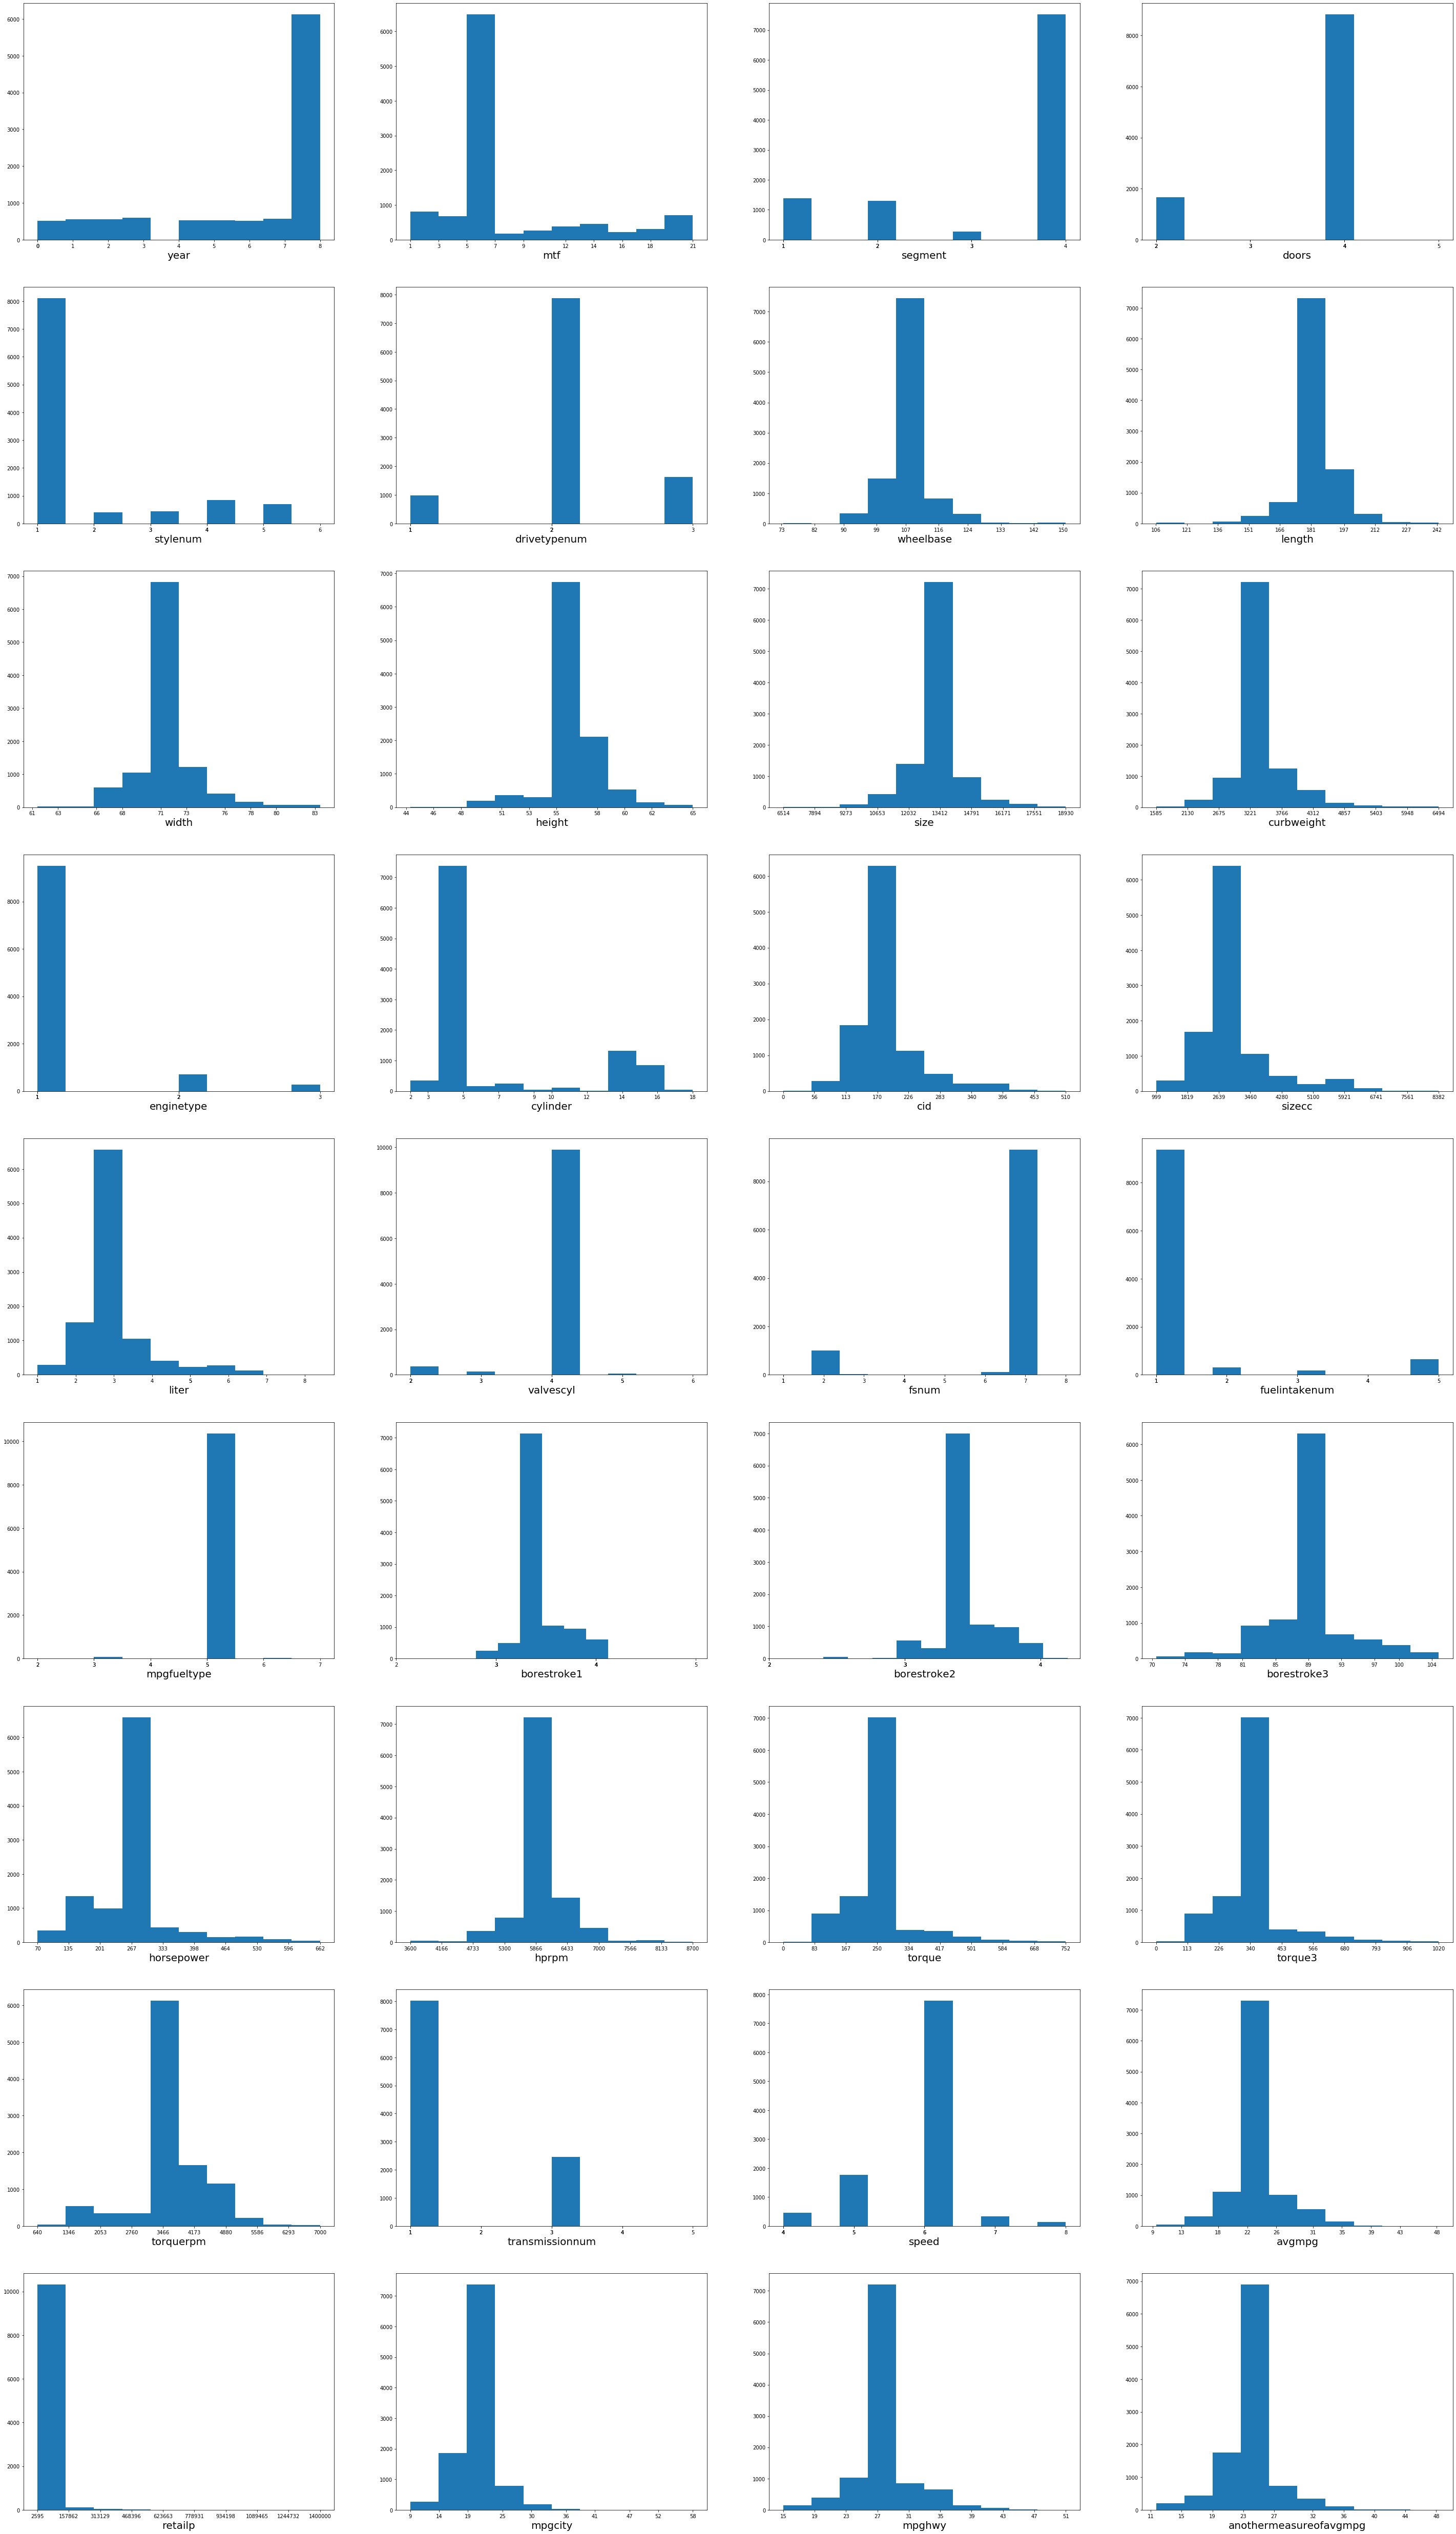

In [10]:
plt.figure(figsize=(50,90))

for count,i in enumerate(org_cols):
    plt.subplot(9, 4, count+1)
    plt.hist(data_full[i])
    plt.xlabel(str(i), fontsize = 20)
    plt.xticks([int(j) for j in np.linspace(data_full[i].max(),data_full[i].min(), num = 10)])

**Understand target variables: average miles per gallon (avgmpg)**

There are outliers but we don't know if we should exclude them or not.

(15, 35)

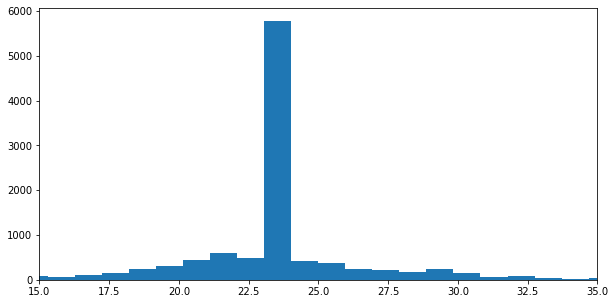

In [11]:
plt.figure(figsize = (10,5))
plt.hist(data_full['avgmpg'], bins=40)
plt.xlim(15,35)

In [12]:
data_full[data_full['avgmpg']>35].count()

year           76
mtfname        76
mtf            76
segmentname    76
segment        76
               ..
manual_2009    76
manual_2010    76
manual_2011    76
manual_2012    76
manual_2013    76
Length: 140, dtype: int64

**Check correlations**

In [13]:
corr = data_full[org_cols].corr()
corr.style.background_gradient(cmap='coolwarm')

**Feature selection**:
1. Find out which columns are highly correlated with our target variable, 'avgmpg'. We would use them for our baseline models.
2. We should not variables that are too highly correlated with one another, such as ['length', 'width', 'wheelbase', 'curbweight'] or ['torque', 'torque3'] to **avoid multi-collinearity**.

**Data leakage**:

Three variables that are too highly correlated with 'avgmpg' are 'mpgcity', 'mpghwy', 'anothermeasureofavgmpg'. It is because our target variable is generated from these variables. We should leave them out of our baseline model to avoid data leakage.




In [14]:
corr[abs(corr['avgmpg']) >0.5]['avgmpg']

segment                  -0.527853
length                   -0.528218
width                    -0.605759
size                     -0.601734
curbweight               -0.764160
cylinder                 -0.520604
cid                      -0.802872
sizecc                   -0.806227
liter                    -0.806063
borestroke1              -0.546516
borestroke3              -0.562495
horsepower               -0.815696
torque                   -0.778143
torque3                  -0.772229
avgmpg                    1.000000
retailp                  -0.507921
mpgcity                   0.983394
mpghwy                    0.979270
anothermeasureofavgmpg    0.996993
Name: avgmpg, dtype: float64

**Understand 'segments'**

1: Small cars, 2: Mid-sized cars, 3: Large cars, 4: Luxury cars <br>
A huge percentage of our instances are luxury cars.


[Text(0, 0, 'SMALL'),
 Text(0, 0, 'MID'),
 Text(0, 0, 'LARGE'),
 Text(0, 0, 'LUX')]

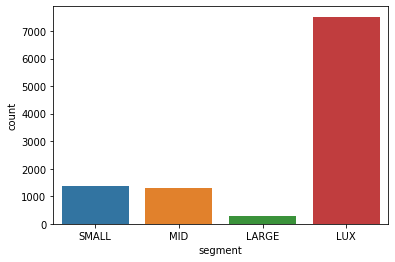

In [15]:
ax = sns.countplot(data['segment'])
ax.set_xticklabels(['SMALL','MID','LARGE','LUX'])

**Understand 'cylinder'**

The number and cylinder types are mapped as follows:<br>
V-6: 14, I-4: 5, V-8: 16, W-12: 18, I-6: 7, ... 

The majority of cars in our dataset uses I-4 and V-6 for their cylinder.

In [16]:
data['cylindername'].unique(), data_full['cylinder'].unique()

(array(['V-6', 'I-4', 'V-8', 'W-12', 'I-6', 'V-12', 'V-10', 'i-6', 'V-7',
        'V-9', 'V-11', 'V-13', 'V-14', 'H-6', 'H-4', 'I-5', 'I-3', nan],
       dtype=object),
 array([14.,  5., 16., 18.,  7., 11., 12.,  9., 15., 17., 10., 13.,  3.,
         2.,  6.,  4.]))

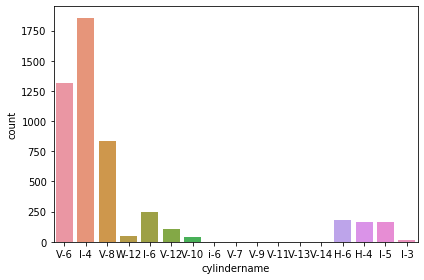

In [17]:
sns.countplot(data['cylindername'])
plt.tight_layout()

**Understand 'retail price'**

This data has some outliers that should be excluded. Since it's in a much larger scale than the others, it needs to be normalized.

Typically, the retail price for a car in our dataset is ranged from 40,000 to 52,000. A portion of the population ranges between 12,000 to 40,000. Only a couple of them is more expensive than 80,000 (USD).

Furthermore, these super-expensive cars (> 80,000 USD) are sports cars, which are very much different from other car models in our dataset. We decide to leave them out.

(0, 80000)

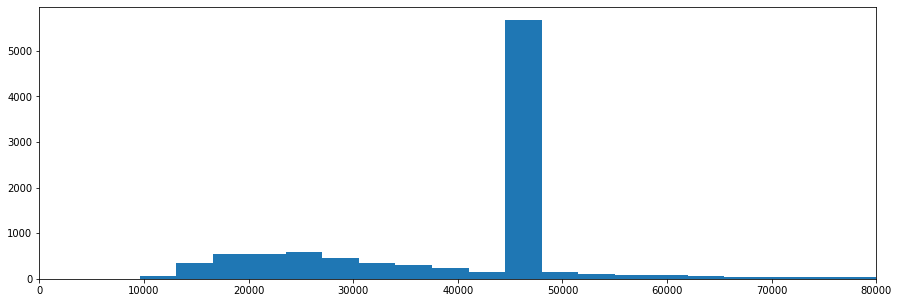

In [18]:
plt.figure(figsize=(15,5))
plt.hist(data_full['retailp'], bins=400)
plt.xlim(0,80000)

In [24]:
data_full = data_full[data_full['retailp']<=80000]

**Create a pairplot of highly correlated features**

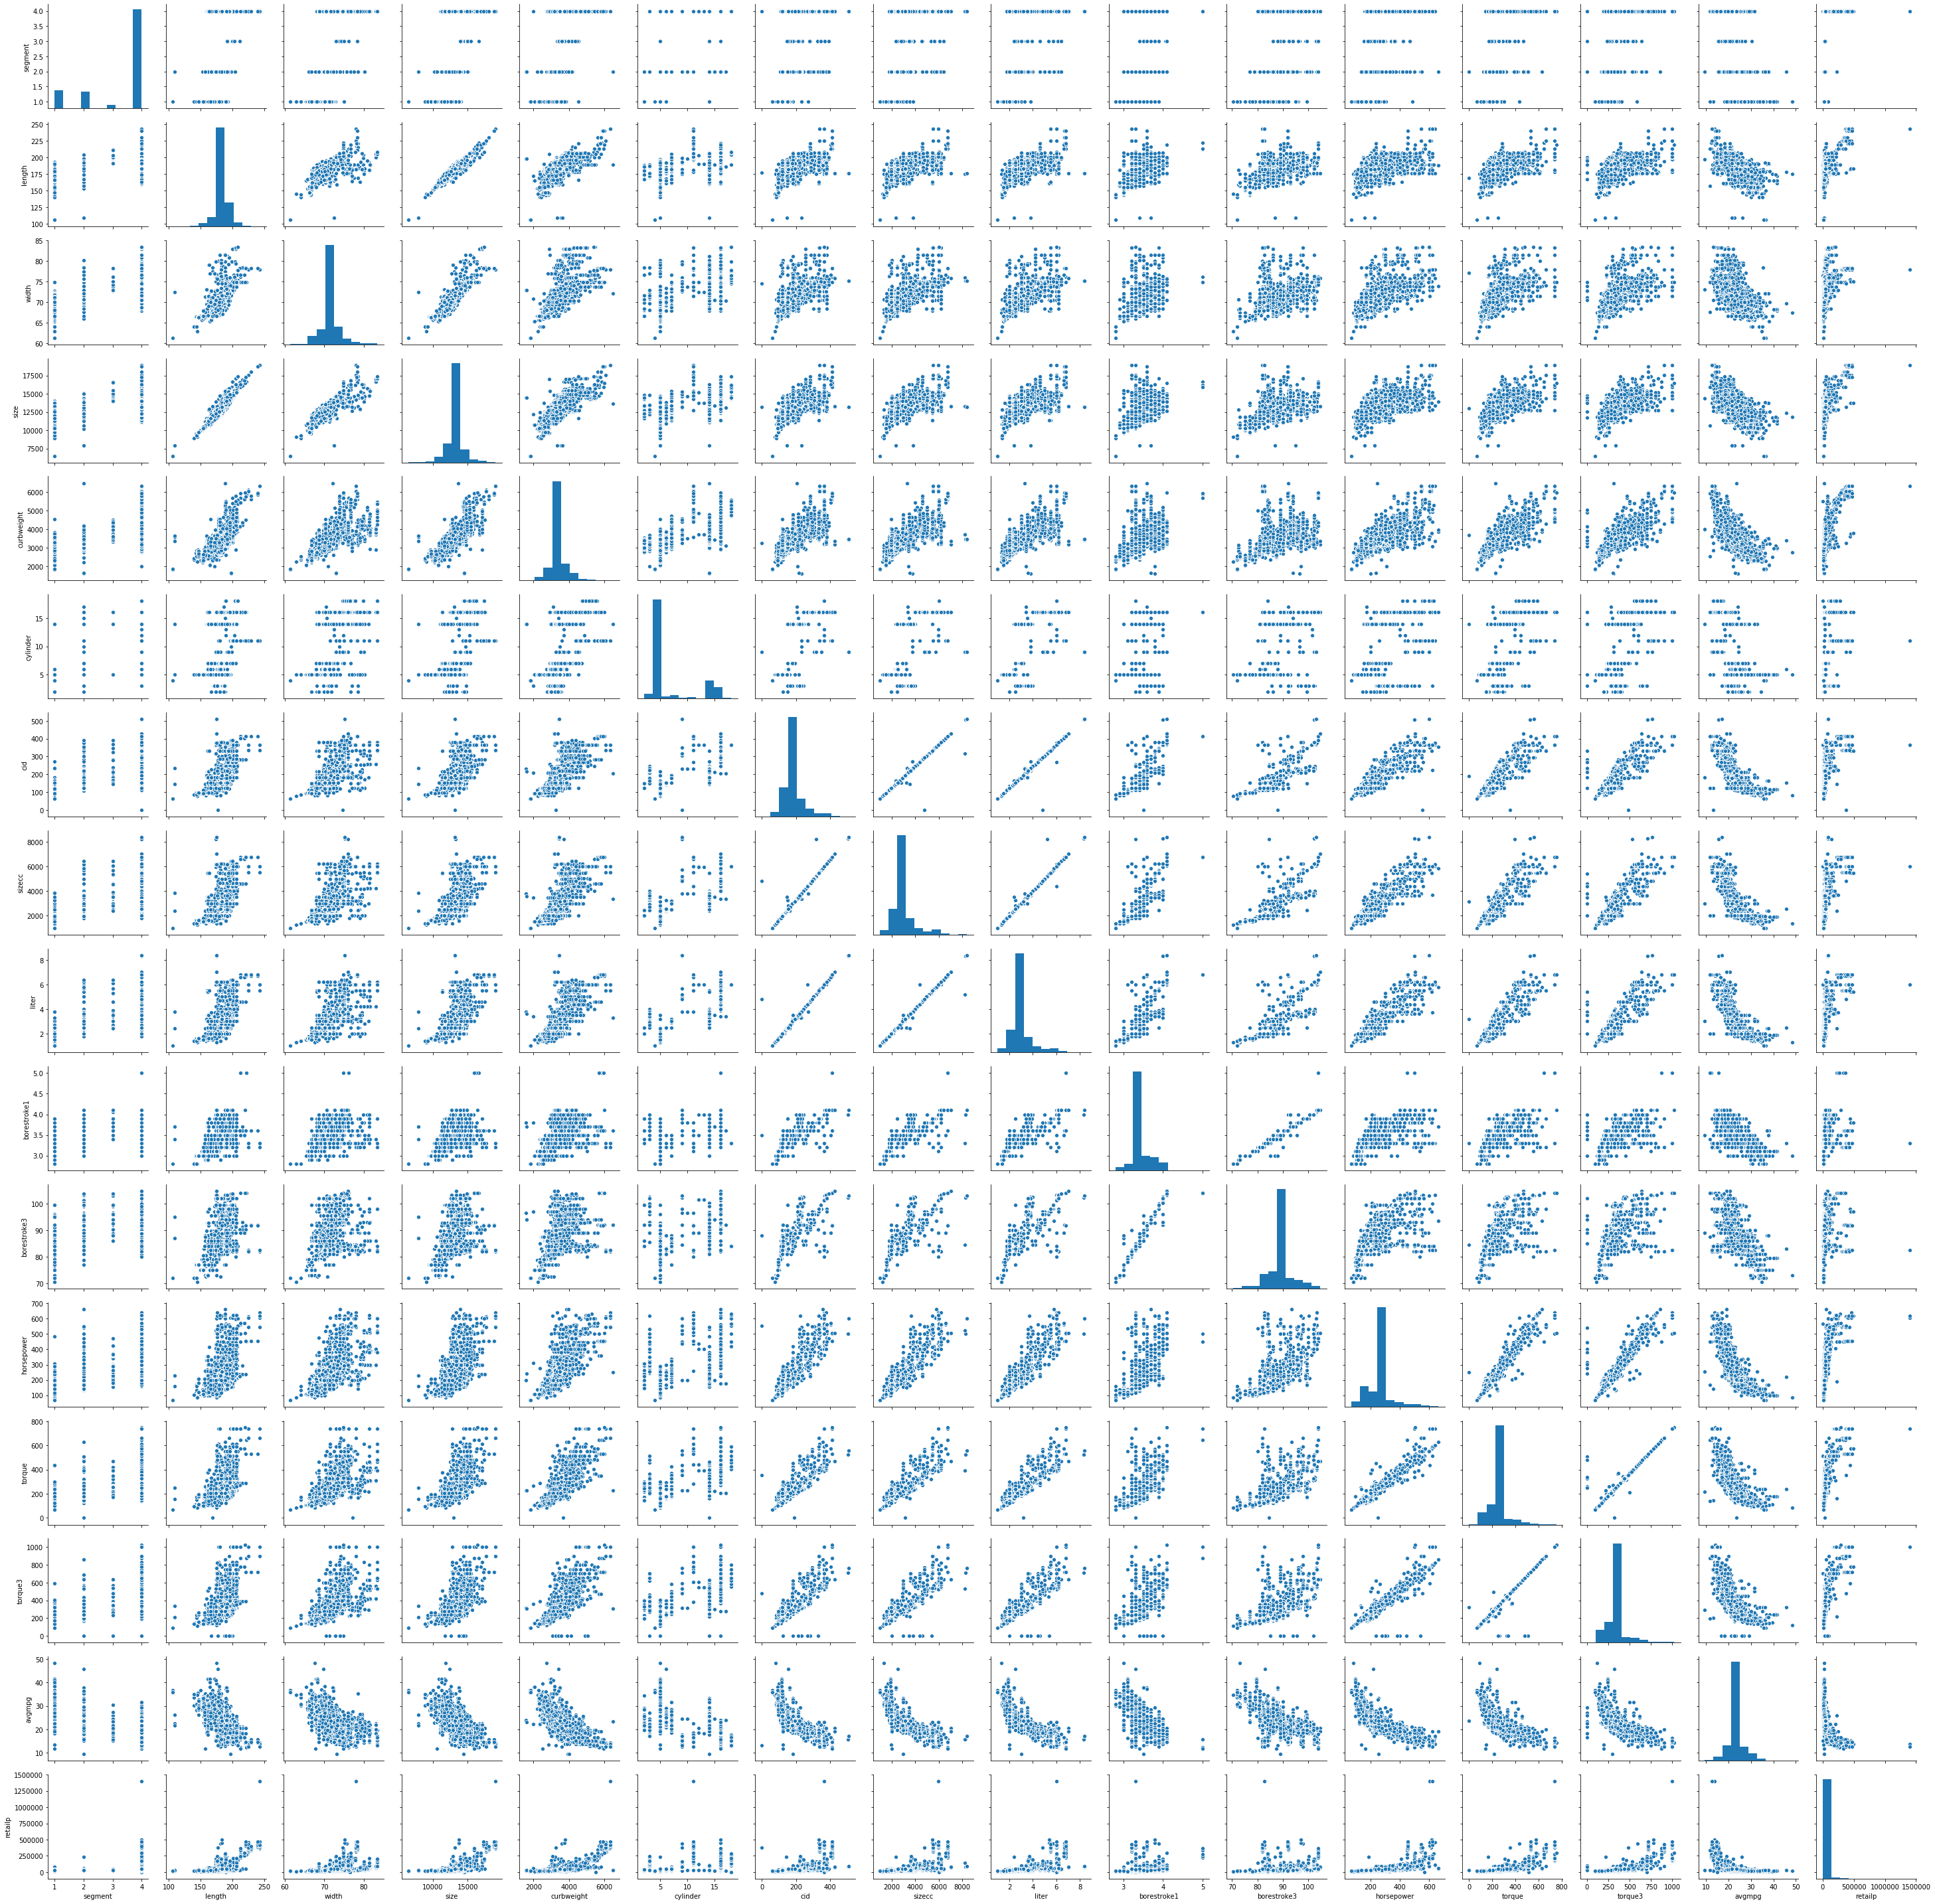

In [19]:
high_corr = corr[abs(corr['avgmpg']) >0.5]['avgmpg'].index.tolist()
high_corr.remove('mpgcity')
high_corr.remove('mpghwy')
high_corr.remove('anothermeasureofavgmpg')
sns.pairplot(data_full[high_corr])

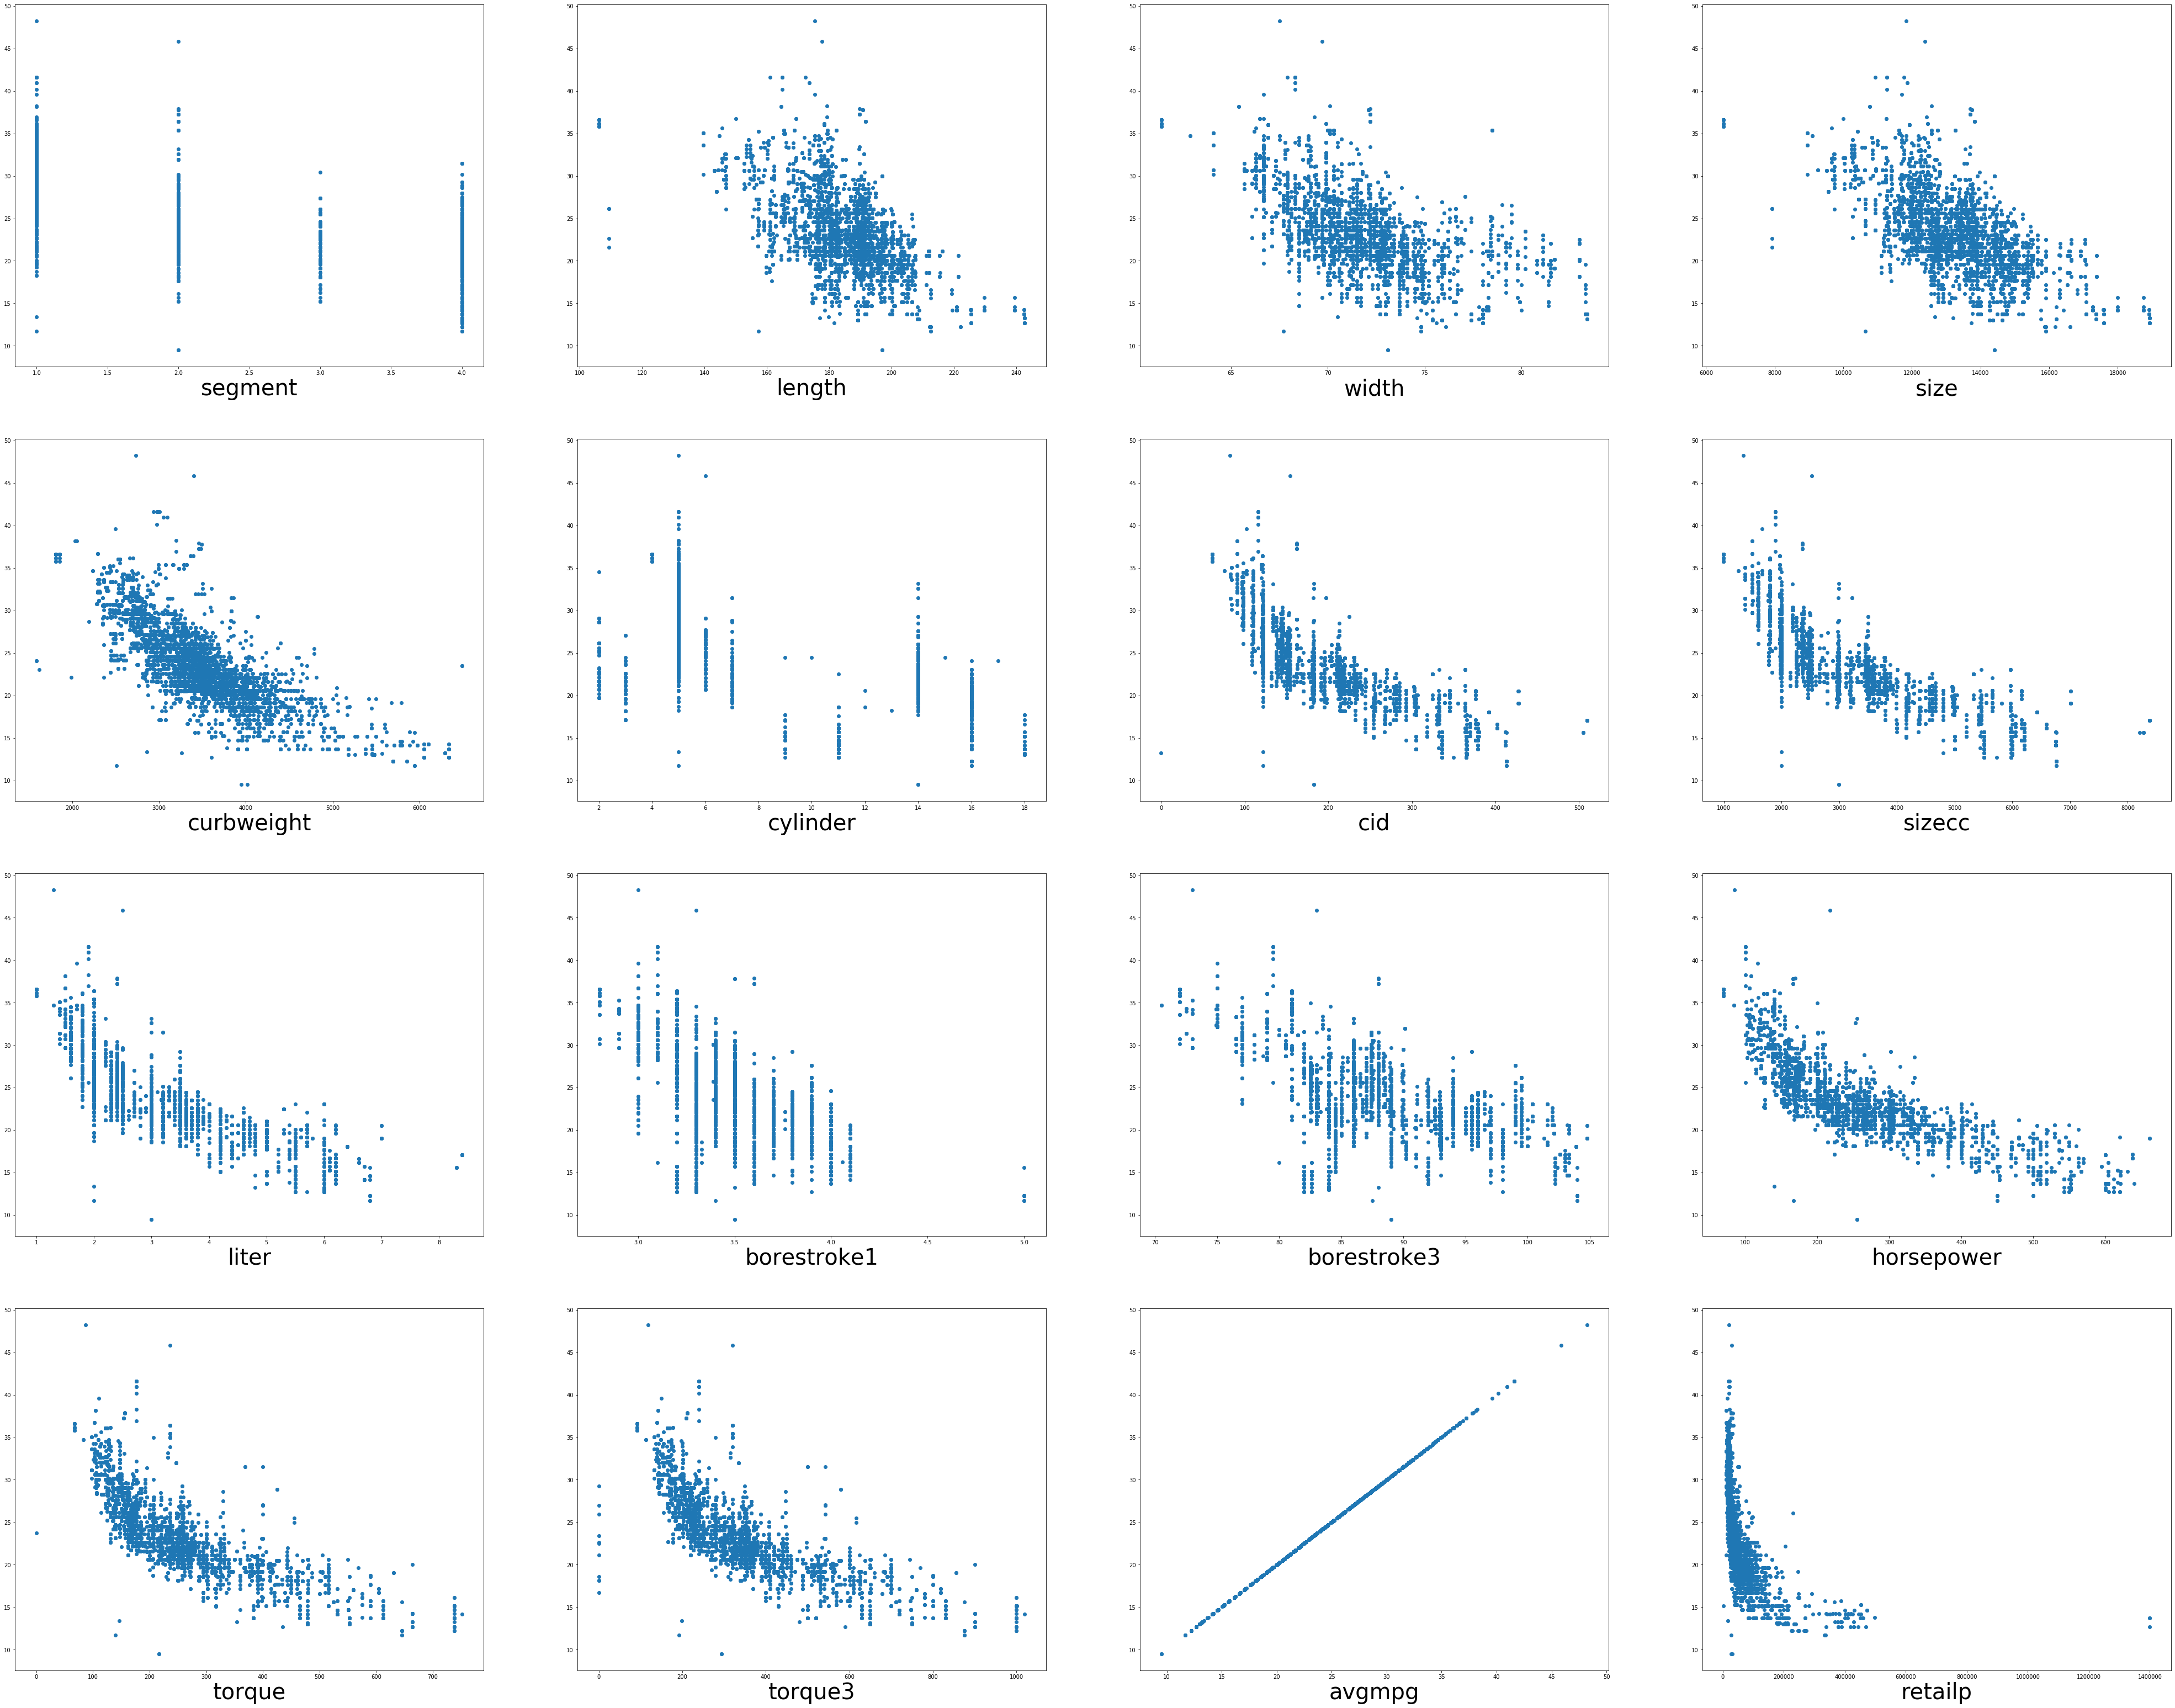

In [20]:
#high_corr.remove('avgmpg')
plt.figure(figsize=(70,70))

for count,i in enumerate(high_corr):
   
    plt.subplot(5,4,count+1)
    plt.scatter(data_full[i],data_full['avgmpg'])
    plt.xlabel(str(i), fontsize = 40)

In [25]:
# Export data

data_full.to_csv('car_data_full.csv')